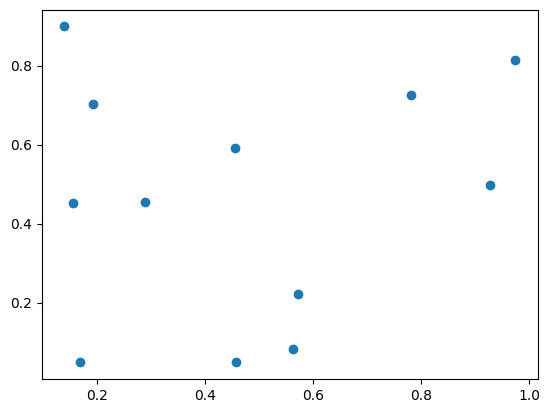

In [51]:
import json
from GenerateTestData import readCustomDataset, createCustomDataset
import matplotlib.pyplot as plt
import numpy as np



data = createCustomDataset(num_turbines=12, min_distance=.1, bird_radius=.3)

plt.scatter(*zip(*data))

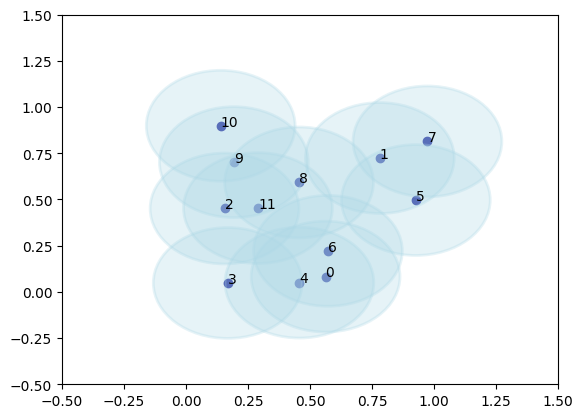

In [70]:

def drawGraph(graph, radius):
    fig, ax = plt.subplots()
    
    
    # Scatter plot of data points
    for i, point in enumerate(graph.vertices.values()):
        ax.scatter(*point, color='darkblue', label="Data points")
        ax.annotate(str(i), (point[0], point[1]))
    
    # Add circles around each point
    for (i, j) in data:
        circle = plt.Circle((i, j), radius=radius, color='lightblue', lw=2, alpha=.3)
        ax.add_artist(circle)
    
    ax.set_ylim(-0.5,1.5)
    ax.set_xlim(-0.5,1.5)
    
    plt.show()

graph = Graph(data, 0.3)
drawGraph(graph, 0.3)

In [56]:
print(data)

[[0.562953968037814, 0.08284824035448857], [0.7816653581566206, 0.724216294349444], [0.1555715273054119, 0.4512031032451391], [0.16838221667111652, 0.04821961152133725], [0.4575502415232783, 0.050197472386888986], [0.926880690440199, 0.4971514946242499], [0.5723850026091252, 0.22222011362726812], [0.9736913398843116, 0.8141250195805816], [0.45597203797145636, 0.59222682029201], [0.19307322721806008, 0.7019683023840898], [0.14009395536565983, 0.8988836026262755], [0.2901943809595311, 0.4534291509745946]]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[(0, 4), (0, 6), (1, 7), (2, 11), (4, 6), (8, 11), (9, 10)]


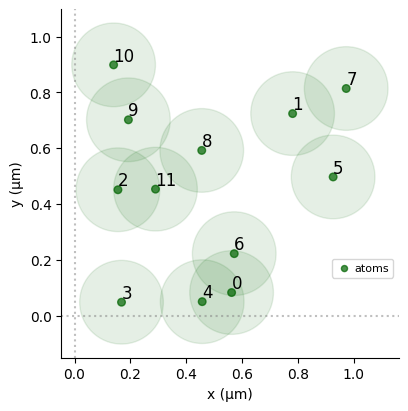

Max independent set:  [0, 1, 2, 3, 5, 8, 9]
Max independent set:  [1, 2, 3, 4, 5, 8, 9]
Max independent set:  [1, 2, 3, 5, 6, 8, 9]
Max independent set:  [0, 2, 3, 5, 7, 8, 9]
Max independent set:  [2, 3, 4, 5, 7, 8, 9]
Max independent set:  [2, 3, 5, 6, 7, 8, 9]
Max independent set:  [0, 1, 2, 3, 5, 8, 10]
Max independent set:  [1, 2, 3, 4, 5, 8, 10]
Max independent set:  [1, 2, 3, 5, 6, 8, 10]
Max independent set:  [0, 2, 3, 5, 7, 8, 10]
Max independent set:  [2, 3, 4, 5, 7, 8, 10]
Max independent set:  [2, 3, 5, 6, 7, 8, 10]
Max independent set:  [0, 1, 3, 5, 9, 11]
Max independent set:  [1, 3, 4, 5, 9, 11]
Max independent set:  [1, 3, 5, 6, 9, 11]
Max independent set:  [0, 3, 5, 7, 9, 11]
Max independent set:  [3, 4, 5, 7, 9, 11]
Max independent set:  [3, 5, 6, 7, 9, 11]
Max independent set:  [0, 1, 3, 5, 10, 11]
Max independent set:  [1, 3, 4, 5, 10, 11]
Max independent set:  [1, 3, 5, 6, 10, 11]
Max independent set:  [0, 3, 5, 7, 10, 11]
Max independent set:  [3, 4, 5, 7, 10, 11]

In [67]:
%load_ext autoreload
%autoreload 2

from pulser import Register
from Graph import Graph

graph = Graph(data,0.5)

print(graph.edges)

qubits = dict(enumerate([[v for v in c] for c in data]))
reg = Register(qubits)
reg.draw(
    blockade_radius=.3,
    draw_graph=False,
    draw_half_radius=True,
)

powerSet = graph.generatePowerSet()
maxIndSets = []
for subset in powerSet:
    if graph.checkMaxIndependentSet(subset):
        print("Max independent set: ", subset)
        maxIndSets.append(subset)

minMIS = maxIndSets[0]
for mis in maxIndSets:
    if len(mis) < len(minMIS):
        minMIS = mis

print("\nMinimum Max Independent Set: ", minMIS)

